# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang saya peroleh berasal dari sumber Kaggle:
<br>
https://www.kaggle.com/datasets/alexuniversite/personal-loan-prediction

<br>
Dataset ini berisi informasi rinci tentang 5000 pelanggan bank, mencakup profil demografi, hubungan yang ada dengan bank (misalnya, rekening, hipotek), dan tanggapan mereka terhadap kampanye penawaran pinjaman pribadi baru-baru ini. Variabel target utama adalah Personal Loan, sebuah indikator biner (0 atau 1) yang menunjukkan apakah seorang pelanggan menerima penawaran pinjaman pribadi.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv(r'../Bank_Personal_Loan.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##### Mengecek Informasi Dataset (Tipe Data)

In [55]:
print(f'Bentuk dari dataset: {df.shape}\n')
df.info()

Bentuk dari dataset: (5000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Dataset ini terdiri dari beberapa kolom:
1.	ID	: Customer id
2.	Age	: Customer's age in completed years
3.	Experience : No. of years of professional experience
4.	Income	: Annual income of the customer
5.	ZIP Code : Home address zip code
6.	Family : Family size of the customer
7.	CCAvg : Avg. Spending on credit card per month
8.	Education : Education level. (1: Undergrad; 2: Graduate; 3: Advanced / Professional)
9.	Mortgage : Value of house mortgage if any.
10.	Securities Account : Does the customer have a securities account with the bank? (0,1)
11.	CD Account : Does the customer have a certificate of deposit (CD) account with the bank? (0,1)
12.	Online : Does the customer use internet banking facilities? (0,1)
13.	Credit card : Does the customer use a credit card issued by this Bank? (0,1)
14.	Personal Loan : This is the Target variable ➡️ Did this customer accept the personal loan offered in the last campaign? (0,1)

##### Mengecek Statistik Deskriptif

In [56]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Dari hasil statistik deskriptif ini, terdapat kesalahan nilai pada kolom Experience, dimana terdapat nilai minimalnya yang ternyata bernilai negatif (harusnya durasi pengalaman kerja tidak ada yang bernilai negatif).

##### Mengecek Missing Value, Data Duplicate, dan Noise Lainnya

In [57]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [58]:
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 0


Berdasarkan hasil pengecekan yang ada, dataset ini tidak memiliki missing value ataupun data yang terduplikat

##### Melakukan eksplorasi pada dataset

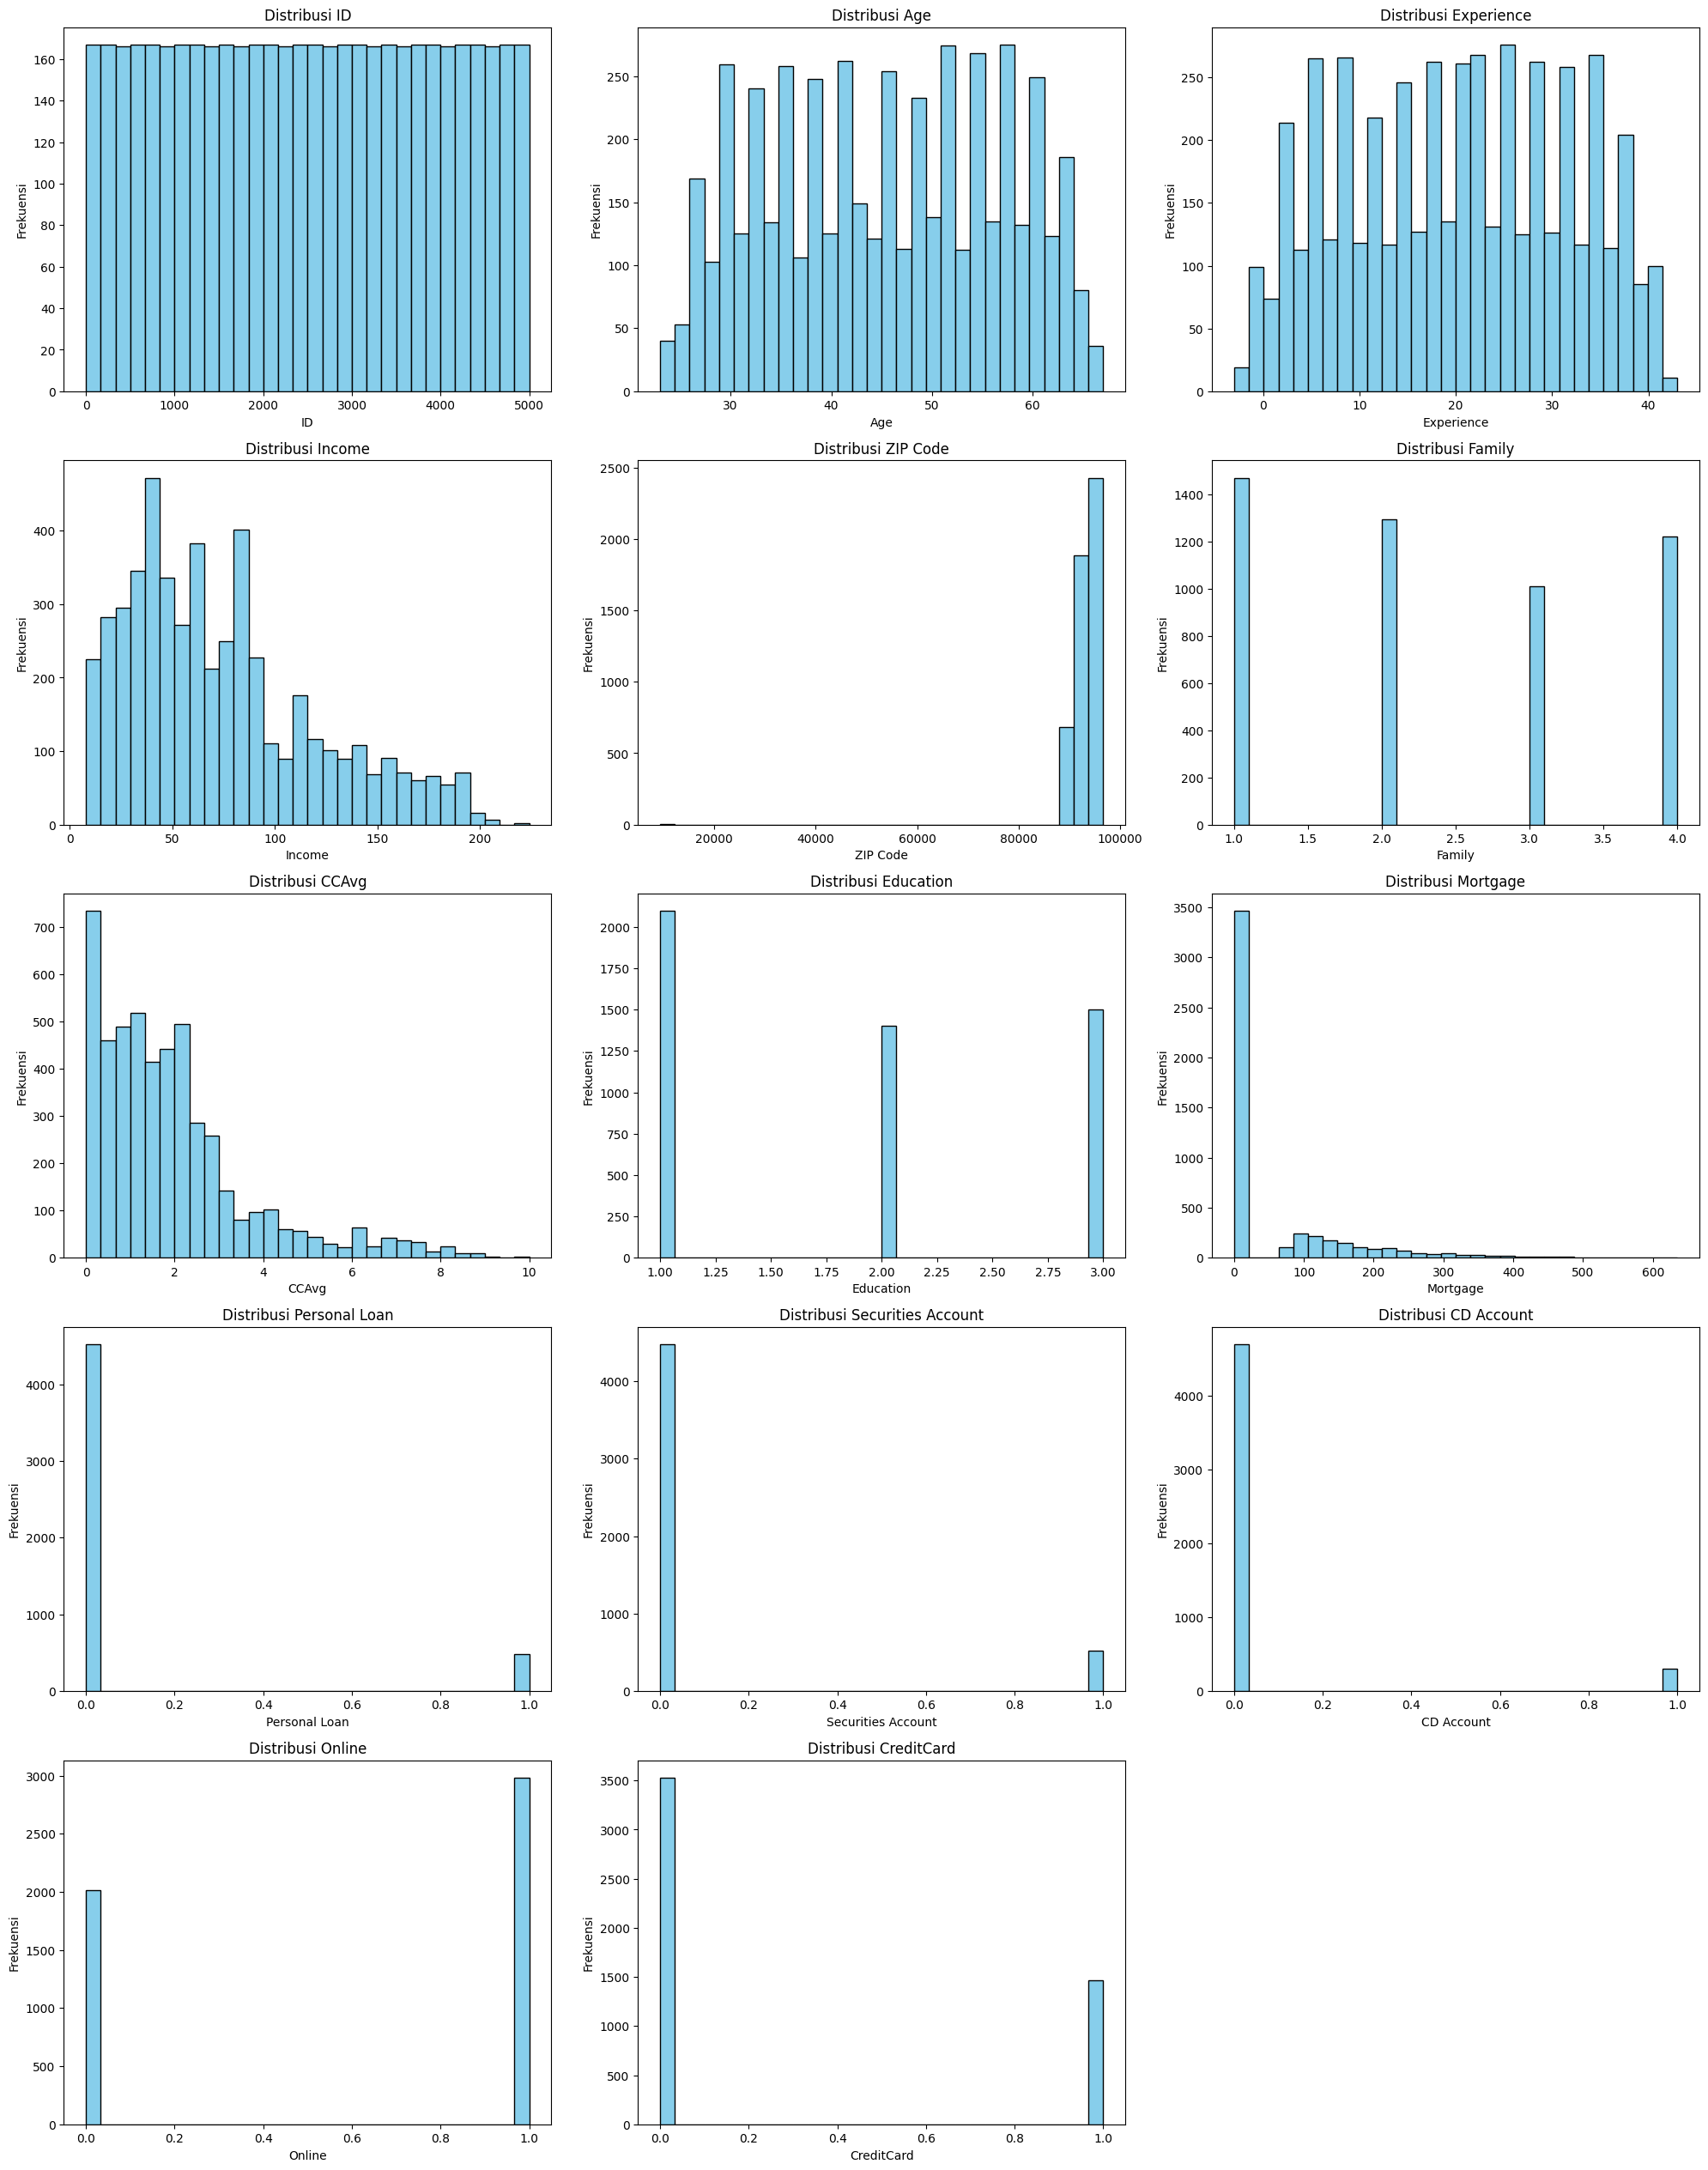

In [59]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

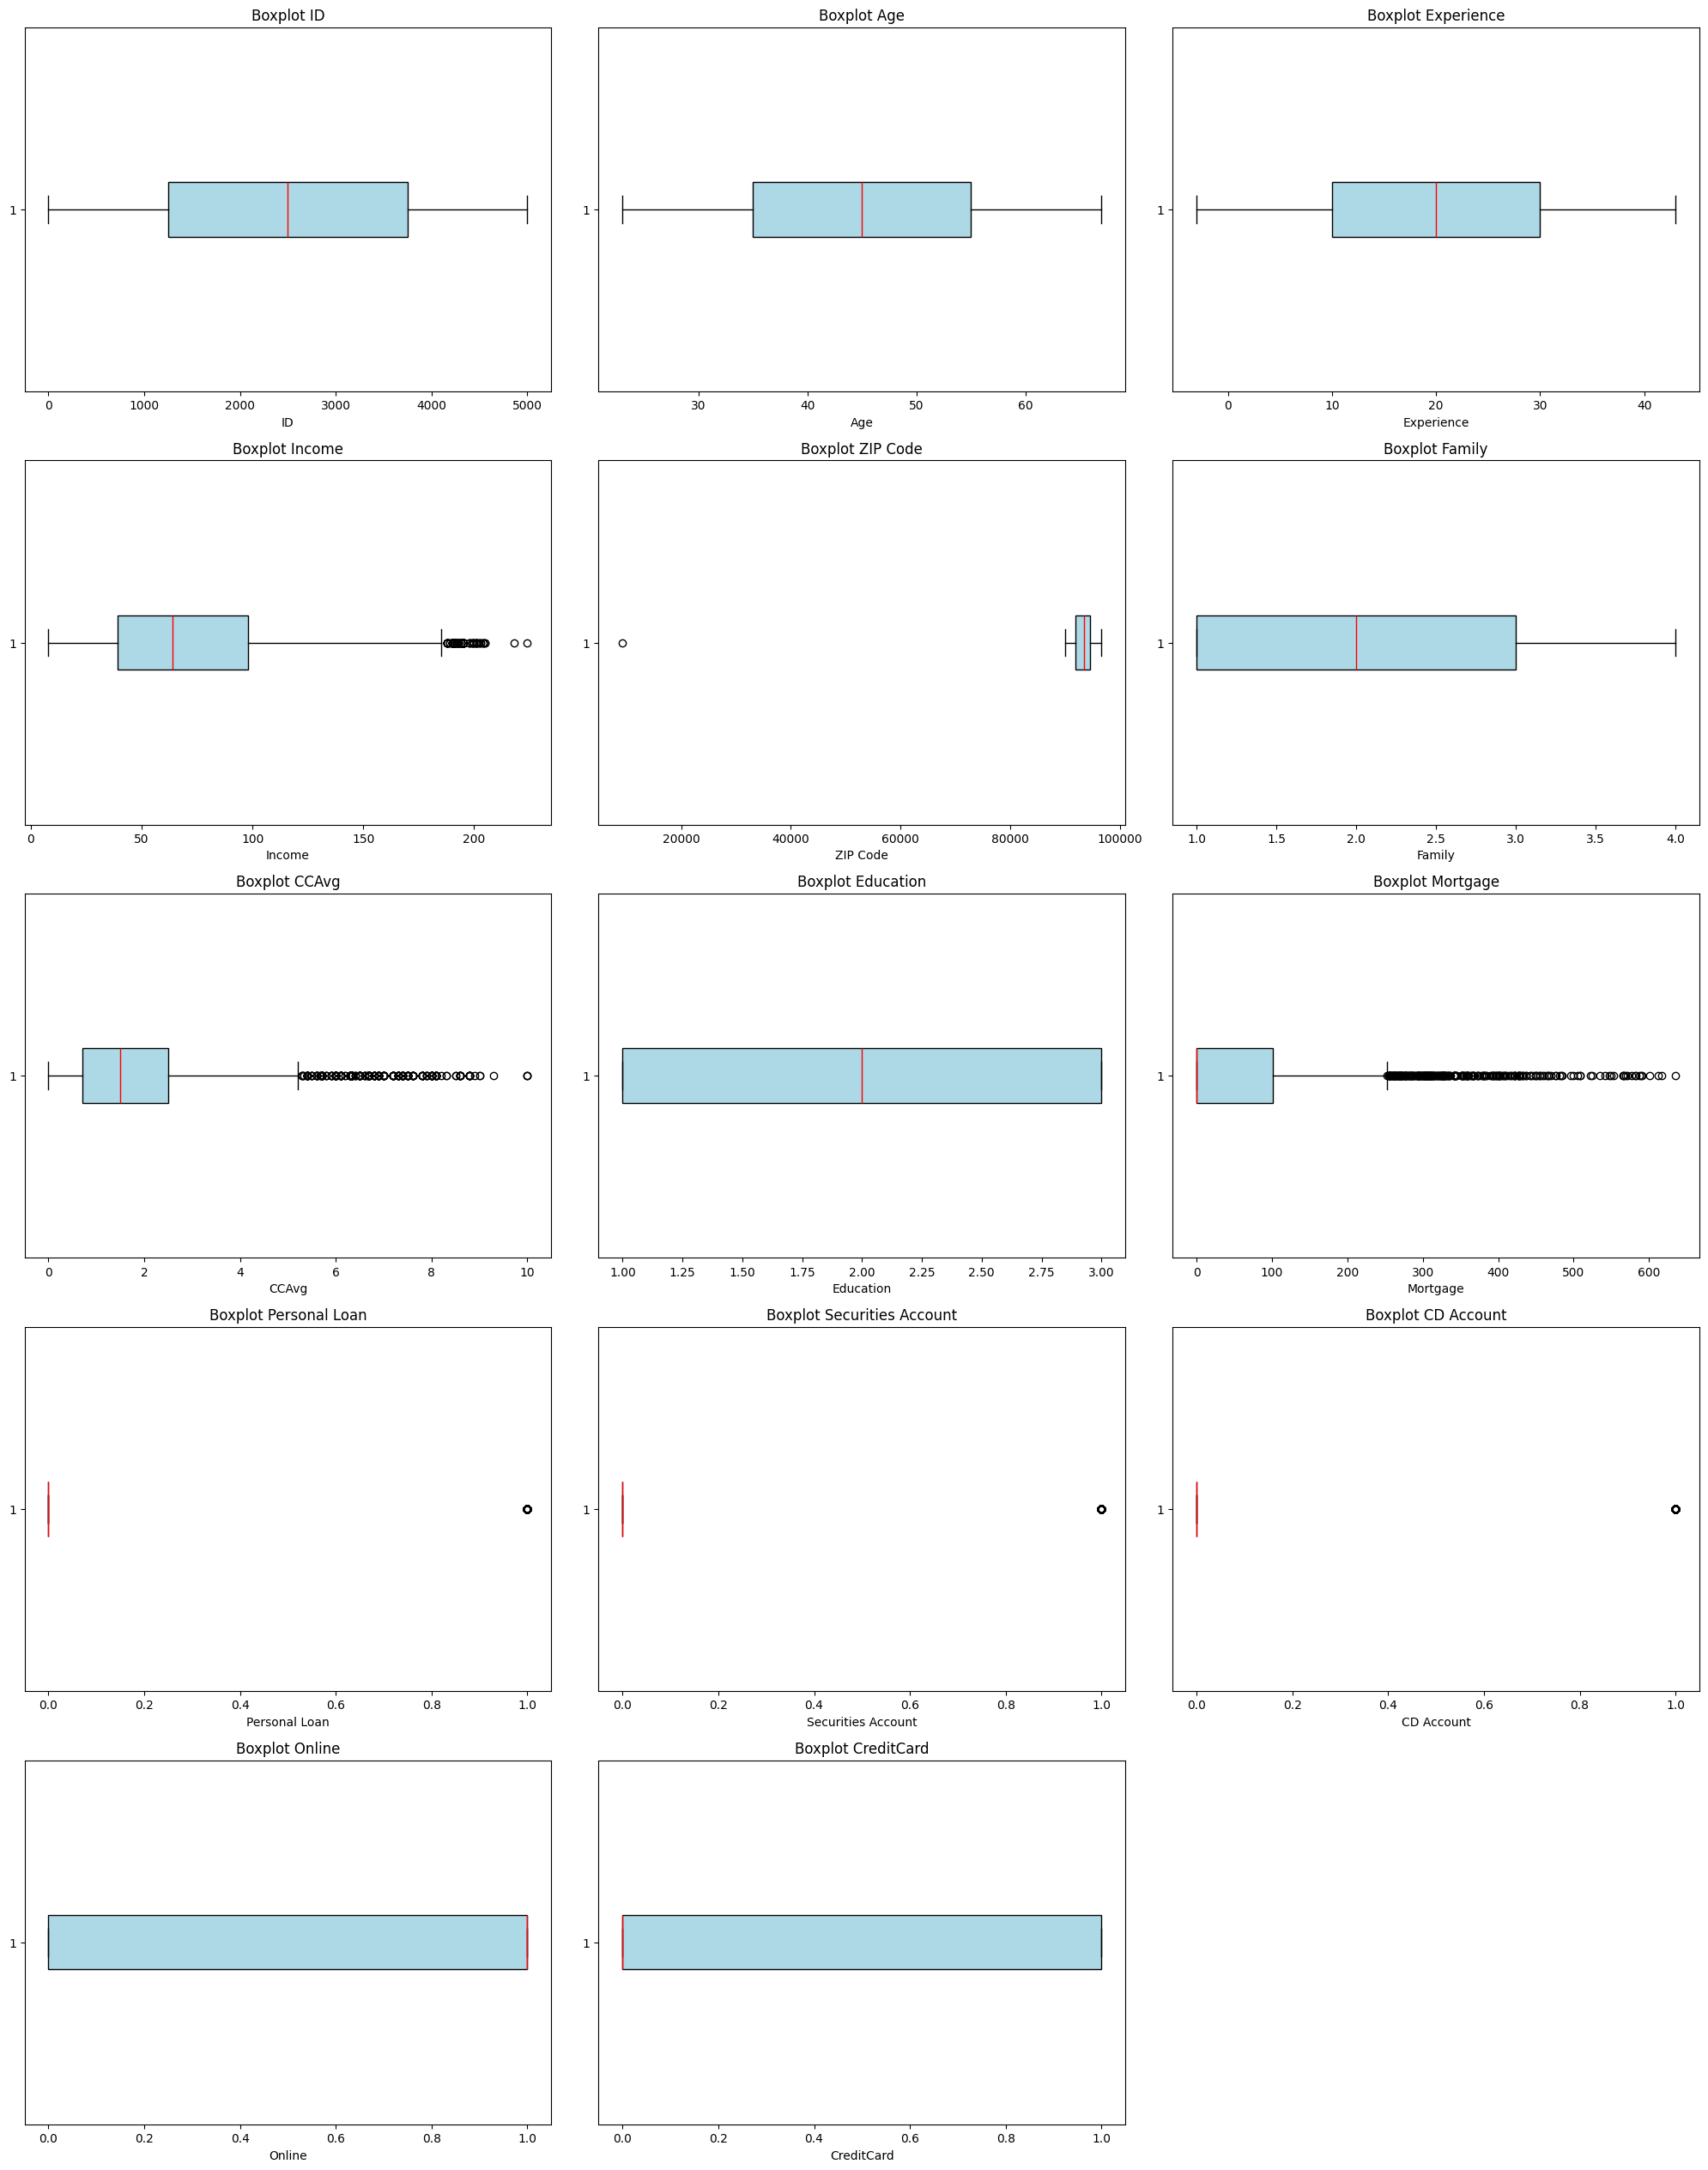

In [60]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

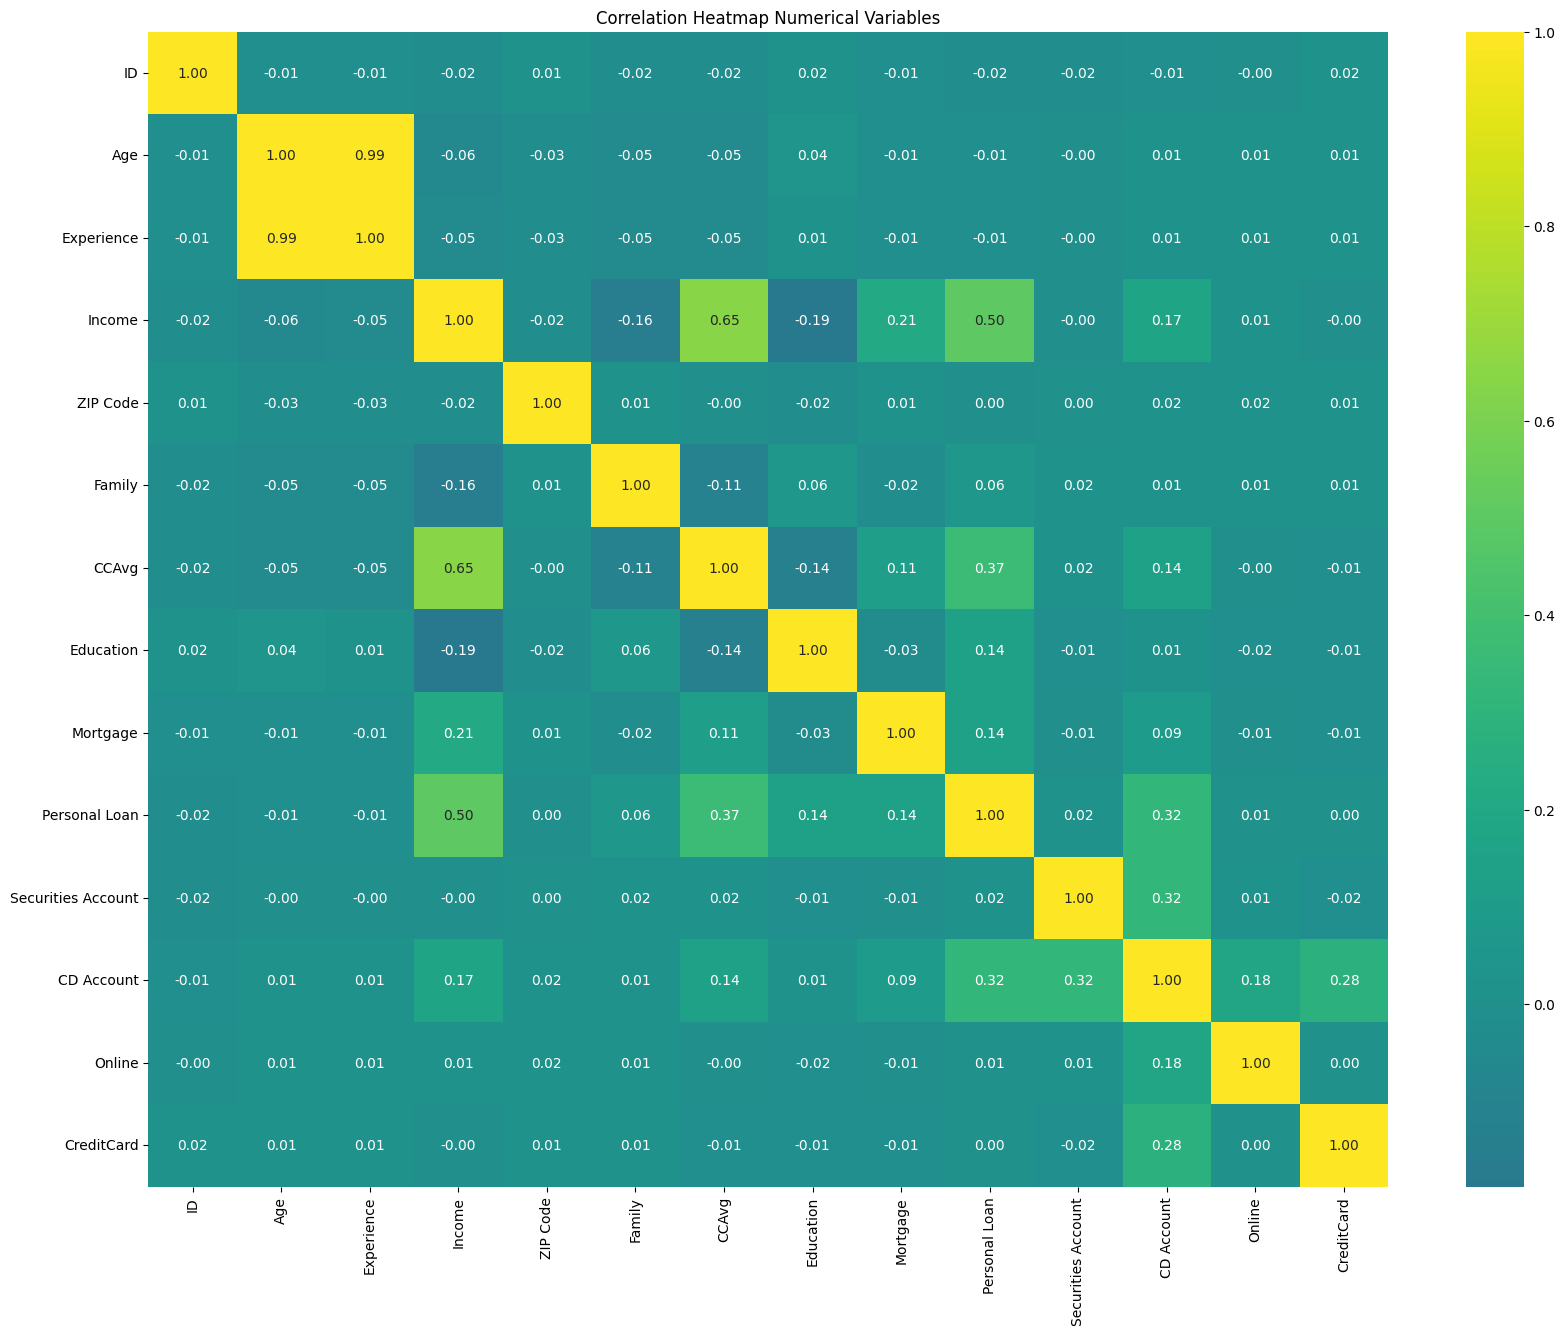

In [61]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='viridis', center=0)
plt.title('Correlation Heatmap Numerical Variables')
plt.show()

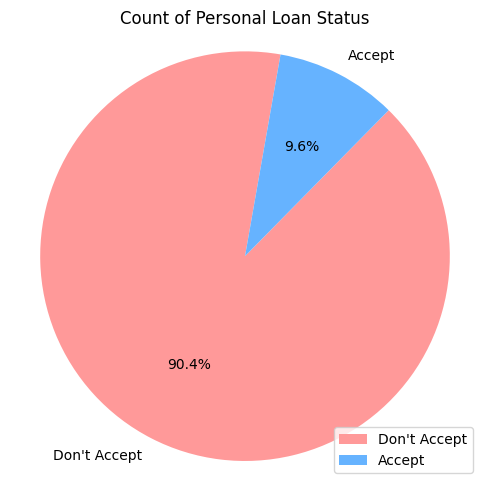

In [62]:
counts = df['Personal Loan'].value_counts().sort_index()

labels = ['Don\'t Accept', 'Accept']
sizes = counts.values

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=80,
    colors=['#ff9999', '#66b3ff']
)

plt.title("Count of Personal Loan Status")
plt.legend(loc='lower right')
plt.axis('equal')
plt.tight_layout()
plt.show()

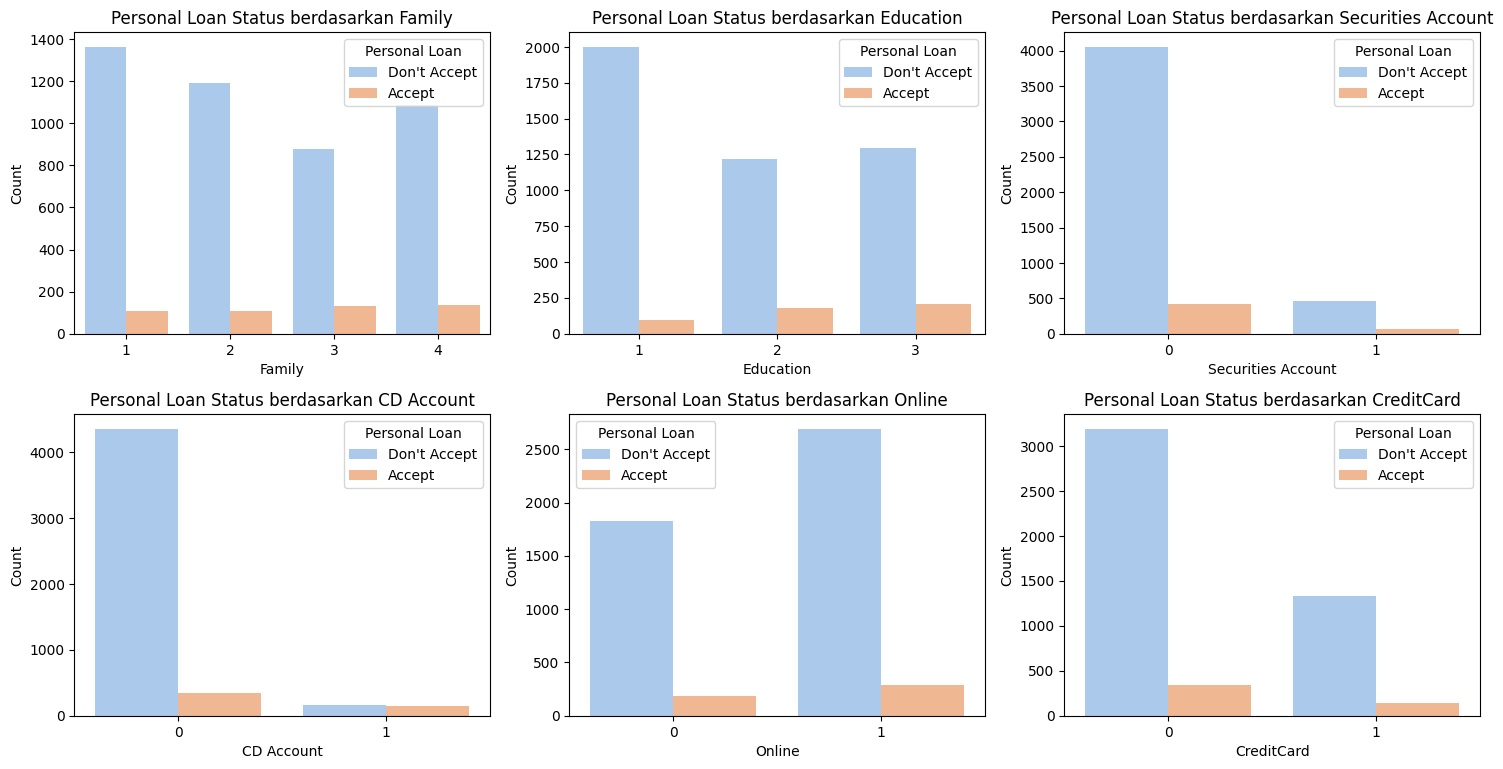

In [63]:
categorical_columns = df[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_columns.columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Personal Loan', palette='pastel')
    plt.title(f'Personal Loan Status berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Personal Loan', labels=["Don't Accept", "Accept"])
    
plt.tight_layout()
plt.show()

Beberapa rangkuman yang bisa diperoleh dari hasil eksplorasi dataset ini:
1. Visualisasi Distribusi:
    - Income, CCAvg, dan Mortgage memiliki distribusi miring ke kanan (right-skewed), menandakan sebagian besar nasabah memiliki pendapatan, rata-rata penggunaan kartu kredit, dan hipotek yang rendah.
    - Kolom Personal Loan, Securities Account, CD Account, Online, dan CreditCard didominasi oleh nilai 0, artinya sebagian besar nasabah tidak menerima pinjaman atau menggunakan layanan tersebut.
2. Visualisasi Boxplot:
    - Terdapat beberapa kolom yang nampaknya memiliki nilai outlier (Income, CCAvg, dan Mortage). Namun, nilai ini tidak akan dihapus mengingat hasil dari statistik deskriptif sebelumnya memperlihatkan nilai maksimal dari kolom-kolom ini sebenarnya masih dalam kewajaran.
3. Visualisasi Heatmap:
    - Age dan Experience memiliki korelasi hampir sempurna (0.99), artinya nilai Experience kemungkinan besar dihitung dari Age — ini menunjukkan multikolinearitas, sehingga salah satu bisa di-drop dalam model prediktif.
    - Income dan CCAvg berkorelasi positif cukup kuat (0.65), masuk akal karena rata-rata pengeluaran kartu kredit biasanya naik seiring pendapatan.
    - Kolom seperti ZIP Code, Family, Online, dan CreditCard memiliki korelasi yang sangat rendah terhadap Personal Loan, yang berarti mereka mungkin kurang relevan secara langsung sebagai prediktor dalam model.
4. Visualisasi Barplot:
    - Dataset ini menunjukkan bahwa mayoritas pelanggan tidak menerima penawaran pinjaman pribadi, yang mengindikasikan bahwa penawaran pinjaman pribadi mungkin bukan target utama bagi sebagian besar pelanggan, atau kriteria persetujuan pinjaman sangat ketat.
    - CD Account tampaknya menjadi prediktor paling signifikan untuk penerimaan pinjaman pribadi. Individu yang memiliki akun CD memiliki peluang yang jauh lebih tinggi untuk menerima pinjaman.
    - Ukuran Family, tingkat Education, dan status Online tampaknya tidak memiliki dampak yang signifikan atau korelasinya sangat lemah dengan keputusan penerimaan pinjaman.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

##### Menangani Nilai Negatif kolom Experience

In [64]:
df['Experience'] = abs(df['Experience'])

In [65]:
df[['Experience']].describe()

,Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


##### Feature Selection

Kolom ID dan ZIPCode akan dihapus karena tidak memberikan pengaruh berarti terhadap proses pemodelan nantinya. Selain itu, kolom Experience akan dihapus karena berkorelasi sangat kuat dengan kolom Age 

In [66]:
df_new = df.drop(columns=['ID', 'ZIP Code', 'Experience'])
df_new.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


##### Normalisasi Fitur

In [69]:
selected_features = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

norm_scaler = StandardScaler()
df_new[selected_features] = norm_scaler.fit_transform(df_new[selected_features])
df_new.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,0,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,0,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,0,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,0,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,0,-0.341423,-0.25354,-1.216618,1.549632
